# GDS Converter from aperture

Create GDS Layout from a calculated aperture


In [219]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:

from matplotlib import pyplot as plt 
import numpy as np 
import sys
sys.path.insert(0,'..')
import pyMOE as moe
from scipy.constants import micro, nano, milli

<IPython.core.display.Javascript object>


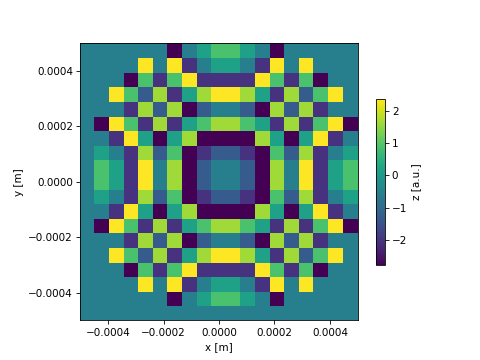

Mask has 400 number of points distributed in 8 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:00.008001
[Total time converting to GDS]
Elapsed: 0:00:00.009001


In [221]:
# Create empty mask

N = 20
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, N, -500*micro, 500*micro, N,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)

# Discretize mask with 8 layers
mask.discretize(8)
moe.plotting.plot_aperture(mask, )

# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(mode="raster",merge=False)

# gdsmask.total_polygons

<IPython.core.display.Javascript object>


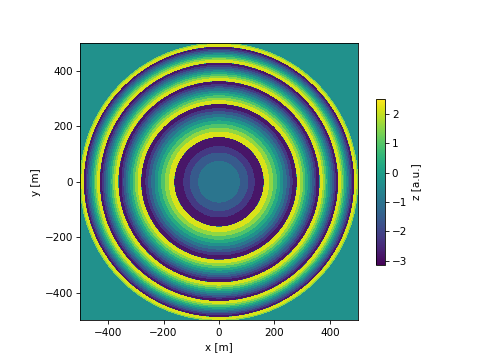

Mask has 1000000 number of points distributed in 10 layers
Creating contours 
[Create Contours]
Elapsed: 0:00:00.209380
Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
[Total time converting to GDS]
Elapsed: 0:00:01.005055


In [222]:
# Create empty mask

N =1000
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, N, -500*micro, 500*micro, N,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)

# Discretize mask with 8 layers
mask.discretize(10)
moe.plotting.plot_aperture(mask, )

# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(mode="countor",merge=False)

# gdsmask.total_polygons

In [7]:
# View layout with embedded gdspy viewer
gdsmask.view_layout()

In [223]:
# Save layout to gdsfile

gdsmask.write_gds("test10.gds")

Saved test10.gds


In [25]:
gdsmask.gdslib.write_svg("test8.svg")

AttributeError: 'GdsLibrary' object has no attribute 'write_svg'

In [9]:
from pyMOE.utils import Timer

In [11]:
# Create empty mask
mask_size = 5000
N = 100
mask = moe.generate.create_empty_aperture(-mask_size*micro, mask_size*micro, N, -mask_size*micro, mask_size*micro, N,)
# f=50mm, lambda=532nm, R=500µm
with Timer("generate fresnel"):
    mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)

[generate fresnel]
Elapsed: 0:00:00.016999


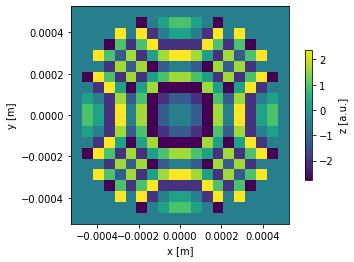

Mask has 400 number of points distributed in 8 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:00.007992
[Total time converting to GDS]
Elapsed: 0:00:00.008991


In [6]:
# Discretize mask with 8 layers
mask.discretize(8)
moe.plotting.plot_aperture(mask, )

# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=False)

# gdsmask.total_polygons

In [28]:
gdsmask.gdslib.cells['mask'].write_svg("test8.svg")

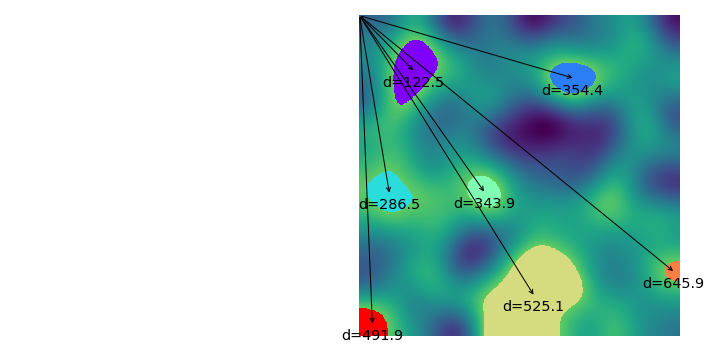

In [7]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

# generate some lowpass-filtered noise as a test image
gen = np.random.RandomState(0)
img = gen.poisson(2, size=(512, 512))
img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
img -= img.min()
img /= img.max()

# use a boolean condition to find where pixel values are > 0.75
blobs = img > 0.75

# label connected regions that satisfy this condition
labels, nlabels = ndimage.label(blobs)

# find their centres of mass. in this case I'm weighting by the pixel values in
# `img`, but you could also pass the boolean values in `blobs` to compute the
# unweighted centroids.
r, c = np.vstack(ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T

# find their distances from the top-left corner
d = np.sqrt(r*r + c*c)

# plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[1].imshow(img)

ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
for ri, ci, di in zip(r, c, d):
    ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
                   arrowprops={'arrowstyle':'<-', 'shrinkA':0})
    ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
                   textcoords='offset points', ha='center', va='top',
                   fontsize='x-large')
for aa in ax.flat:
    aa.set_axis_off()
fig.tight_layout()
plt.show()

In [8]:
blobs

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

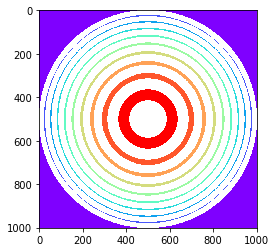

In [9]:
blobs = mask.amplitude>0
labels, nlabels = ndimage.label(blobs)
plt.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
# plt.imshow(blobs, cmap=plt.cm.rainbow)


In [10]:
from skimage import measure

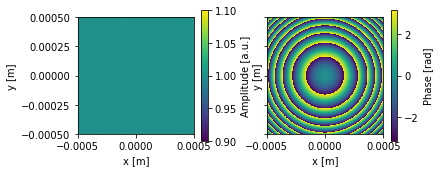

In [11]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

In [12]:
phase = mask.phase

np.max(phase),np.min(phase),np.ptp(phase)

levels = np.linspace(-np.pi, np.pi, 5)
levels

array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265])

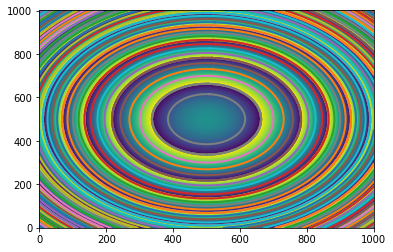

In [13]:
plt.pcolormesh(phase)

for level in levels:
    contours = measure.find_contours(phase, level)


    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

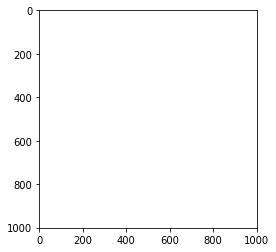

In [14]:
blobs = phase>3
labels, nlabels = ndimage.label(blobs)
plt.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
# plt.imshow(blobs, cmap=plt.cm.rainbow)


(slice(0, 1001, None), slice(0, 1001, None))


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

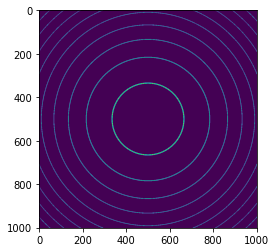

In [15]:
objs = ndimage.find_objects(blobs)

for obj in objs:
    print(obj)
    plt.imshow(blobs[obj])
    break
blobs[obj]

In [16]:

def grayim2gds_writer(infile, outfile, pixelx, pixely, cellname, level, layer=0, datatype=0 , verbose=False):
    """
    (void) Transforms one image (converted to grayscale) into a gds, using cv2 for reading the image
    by default adds the image to (layer, datatype) = (0,0)
    'infile'  = input IMAGE file (on extension that cv2 can read ), e.g. "image.png"
    'outfile' = output GDS file, e.g. "image.gds"
    'pixelx'  = pixel size in x, in um 
    'pixely'  = pixel size in y, in um 
    'cellname'= string with cellname, e.g. "TOP"
    'level'   = int from 0 to 255 (0 = black, 255=white) , pixels gray value to be passed to GDS 

    optional:
    'layer' = gray level, defaults to 0 
    'datatype' = gds datatype, defaults to 0 
    'verbose' defaults to False, if True prints 
    
    ---- 
    Usage example: 
    
    infilxe = "image.png"
    outfilxe = "image.gds"
    cellname = "TOP" #name of the gds cell 
    graycolor = 0 #black pixels 
    pixelx = 1 #um 
    pixely = 1 #um 

    grayim2gds_writer(infilxe, outfilxe, pixelx, pixely,cellname, graycolor, verbose=True)"""
    import cv2
    import gdspy 
    import numpy as np 

    img = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
    
    if img is not None: 
        print("Sucessfully imported img!")
        
    h,w = img.shape 
    print(h)
    print(w) 
    
    nmx = w
    nmy = h
    
    harray = np.arange(0,h+1,nmy)
    warray = np.arange(0,w+1,nmx)
    #print(harray)
    
    lib = gdspy.GdsLibrary()
    gdspy.current_library = gdspy.GdsLibrary() 

    outfilen = outfile
    writer = gdspy.GdsWriter(outfilen,unit=1.0e-6,precision=1.0e-9)
    cell = lib.new_cell(cellname)
    
    for hn, hi in enumerate(harray):
        if hn == (len(harray)-1):
            #writer.close()
            break
        #print(hi)
        for hw, wi in enumerate(warray):
            if hw == (len(warray)-1): 
                break   
            #print(wi)

            for i in np.arange(hi,hi+nmy):
                if verbose == True: 
                    print(i/h)
                
                for j in np.arange(wi, wi+nmx):
                    #print(j/w)
                    #here we can also think of selectin pixels at a certain level only
                    #and creating a GDS from a grayscale image 
                    if img[i][j] == int(level):
                        #rectangle takes the two  opposite corners 
                        #pols.append(gdspy.Rectangle((pixelx*j,-pixely*i),(pixelx*(j+1), -pixely*(i+1)), layer, datatype))
                        rect = gdspy.Rectangle((pixelx*j,-pixely*i),(pixelx*(j+1), -pixely*(i+1)), layer, datatype)
                        
                        cell.add(rect)
                
                writer.write_cell(cell)

        writer.close()

    print("Exported the image file "+str(infile) + " into " + str(outfile))


In [17]:

from IPython.display import clear_output
def progress_bar(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)


array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [86]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 101, -500*micro, 500*micro, 101,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )


mask.phase

phase = mask.phase

blob = phase>0

plt.figure()
plt.imshow(blob)

AssertionError: aperture given is not an Aperture object

In [11]:


# def newGDSMask(aperture, which):
#     """
#     Creates a new GDSMask object loading from aperture
#     """
#     assert type(aperture) is moe.Aperture, "provided aperture must be of type Aperture"
#     assert which in ["phase", "amplitude"], "which must be amplitude or phase"
    
#     if which == "phase":
#         array = aperture.phase
#     elif which == "amplitude":
#         array = aperture.amplitude
#     else:    
#         return -1
#     gdsmask = GDSMask(XX=aperture.XX,
#                    YY=aperture.YY,
#                    mask=array,
#                    pixel_x = aperture.pixel_x,
#                    pixel_y = aperture.pixel_y,
#                   )
#     return gdsmask

In [54]:
units = micro
precision = nano

cellname = "cell1"
layer = 0
datatype = 0

outfile = "test.gds"

lib = gdspy.GdsLibrary()
gdspy.current_library = gdspy.GdsLibrary() 

outfilen = outfile
writer = gdspy.GdsWriter(outfile,unit=micro,precision=precision)
cell = lib.new_cell(cellname)

size_x, size_y = blob.shape
XX = mask.XX
YY = mask.YY

half_pixel_x = mask.pixel_x/2
half_pixel_y = mask.pixel_y/2

warray = range(size_x)
harray = range(size_y)



# normalize to units:
XX = XX/units
YY = YY/units
half_pixel_x = half_pixel_x/units
half_pixel_y = half_pixel_y/units

total_points = size_x*size_y

for i in range(size_x):
    for j in range(size_y):
        current_point = i*size_x+j
        
        #         print(i,j, XX[i,j], YY[i,j], blob[i,j])
        if blob[i,j]:
            x = XX[i,j]
            y = YY[i,j]
            rectangle_first_corner = (x-half_pixel_x,y-half_pixel_y)
            rectangle_second_corner = (x+half_pixel_x,y+half_pixel_y)
            rect = gdspy.Rectangle(rectangle_first_corner, rectangle_second_corner, layer, datatype)
            
            
            cell.add(rect)
#             merged = gdspy.boolean(cell, rect, "or")
#             # remove existing polygons from cell
#             cell.remove_polygons(lambda pts, layer, datatype: True)
#             cell.add(merged)
    progress_bar(current_point/total_points)
writer.write_cell(cell)

writer.close()
        

NameError: name 'blob' is not defined

In [55]:
lib.write_gds("test3.gds")

In [45]:
type(merged.polygons[0])

numpy.ndarray

In [48]:

def merge_polygons(polygons, verbose=True):

    total_polygons = len(polygons)

    for i,pol in enumerate(polygons):
        if i%100==0 & verbose:
            progress_bar(i/total_polygons)

        # first polygon
        if i == 0:
            merged = pol
            continue
        merged = gdspy.boolean(merged, pol, "or")
    progress_bar(i+1/total_polygons)
    return merged


merged = merge_polygons(cell.polygons)

Progress: [####################] 100.0%


In [53]:
cellnames = list(gdsmask.gdslib.cells.keys())
cell = gdsmask.gdslib.cells[cellnames[0]]
cell.paths



[]

In [21]:
merged.get_bounding_box()
merged


lib = gdspy.GdsLibrary()
gdspy.current_library = gdspy.GdsLibrary() 


cell = lib.new_cell(cellname)

cell.add(merged)
gdspy.LayoutViewer()

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: [GDSPY] Use of the global library is deprecated.  Pass LayoutViewer a GdsLibrary instance.
  if sys.path[0] == '':


<gdspy.viewer.LayoutViewer object .!layoutviewer>

In [30]:
len(merged.polygons[0]), merged.layers, print(merged)

PolygonSet (29 polygons, 2571 vertices, layers [0], datatypes [0])


(18,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 None)

In [133]:
lib = gdspy.GdsLibrary()
gdspy.current_library = gdspy.GdsLibrary() 


cell = lib.new_cell(cellname)

rect1 = gdspy.Rectangle((0,0), (10,10), layer, datatype)
cell.add(rect1)
rect2 = gdspy.Rectangle((10,0), (20,10), layer, datatype)
merged = gdspy.boolean(cell, rect2, "or")
# cell.remove_polygons(lambda pts, layer, datatype: layer == 1)
cell.remove_polygons(lambda pts, layer, datatype: True)
cell.add(merged)

gdspy.LayoutViewer()

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: [GDSPY] Use of the global library is deprecated.  Pass LayoutViewer a GdsLibrary instance.
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

In [122]:
# boolean operation

merged_cell = lib.new_cell("merged")
merged = gdspy.boolean(merged_cell, cell, "or")
merged_cell.add(merged)

In [123]:
merged

In [86]:
for hn, hi in enumerate(harray):
    if hn == (len(harray)-1):
        #writer.close()
        break
    #print(hi)
    for hw, wi in enumerate(warray):
        if hw == (len(warray)-1): 
            break   
        #print(wi)

        for i in np.arange(hi,hi+nmy):
            if verbose == True: 
                print(i/h)

            for j in np.arange(wi, wi+nmx):
                #print(j/w)
                #here we can also think of selectin pixels at a certain level only
                #and creating a GDS from a grayscale image 
                if img[i][j] == int(level):
                    #rectangle takes the two  opposite corners 
                    #pols.append(gdspy.Rectangle((pixelx*j,-pixely*i),(pixelx*(j+1), -pixely*(i+1)), layer, datatype))
                    rect = gdspy.Rectangle((pixelx*j,-pixely*i),(pixelx*(j+1), -pixely*(i+1)), layer, datatype)

                    cell.add(rect)

            writer.write_cell(cell)

    writer.close()

NameError: name 'nmy' is not defined

In [4]:
    
    
def change_layers(fstgds_filename, fst_cellname, layerspol,\
                  #fst_layer_nr, fst_datatype_nr, \
                  gvts, output_filename):
    """
    (void) Transforms layers from the source layer into the destination
    #by default considers datatypes are int(0), set datatypes to 0 function can be used before
    'fstgds_filename'   = string filename of gds to read
    'fst_cellname'      = string name of cell in the gds 
    'layerspol'         = array of the layers of the gds file 
    'gvts'              = array of destination layers - MUST HAVE THE SAME CORRESPONDENCE 
    'output_filename'   = string filename of output gds
    """
    
    import pya
    
    #ly1 with 1st gds file
    ly1 = pya.Layout()
    lmap1 = ly1.read(fstgds_filename)
    cll1 = ly1.cell(fst_cellname)
    
    #ly2 with copy of gds file - it will be cleared and written in the correct layers 
    ly2 = pya.Layout()
    lmap2 = ly2.read(fstgds_filename)
    cll2 = ly2.cell(fst_cellname)
    
    #clear the layers in the destination cell 
    for li, lyr in enumerate(layerspol):
        try: 
            cll2.layout().clear_layer(int(li))
        except: 
            print("Could not clear layers... check layer names/nrs in gds file.")
    
    #ntot = np.size(layerspol)
    
    for li, lyr in enumerate(layerspol):
        #select the layer lyr1
        lyr1 = ly1.layer(int(lyr),int(0))
        #print(lyr)
        #define region1 as shapes from lyr1
        region1 = pya.Region(cll1.shapes(lyr1)) 

        #change the shapes from one layer to the other 
        ly2.insert_layer(pya.LayerInfo(int(gvts[li]), int(0)))
        #select layer in the destination gds, corresponds to layerspol one to one 
        lyr12 = ly2.layer(int(gvts[li]), int(0))
        #insert the region1 in the selected layer in the destination gds
        cll2.shapes(lyr12).insert(region1)
        
        print("Changed the shapes in layer "+str(lyr)+" into "+str(gvts[li]))
        
    ly2.write(output_filename)
    
    print("Changed layers - wrote result to " +str(output_filename))

In [43]:
### Write function of change layers from a certain layerpol to a gvts array 

import gdspy 



lib = gdspy.GdsLibrary()


lib.read_gds("operation.gds")
gdspy.current_library = lib


#cell = gdspy.Cell('mask')


In [45]:
#topcell = gdspy.Cell("mask")
#topcell

ValueError: [GDSPY] Cell named mask already present in library.

In [41]:

layers = topcell.get_layers()
print(layers)

set()


In [51]:
listlayers = celltop.get_layers()

In [55]:
np.concatenate(listlayers)

TypeError: The first input argument needs to be a sequence

In [57]:
arr = np.asarray(listlayers)

In [59]:
arr[1]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [62]:
np.array(list(listlayers))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
polygons_dict.keys()

dict_keys([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)])

In [70]:
polygons_dict[(0,0)]

[array([[-155. , -406.5],
        [-157. , -406.5],
        [-157. , -407.5],
        [-155. , -407.5]]),
 array([[-137. , -408.5],
        [-141. , -408.5],
        [-141. , -407.5],
        [-151. , -407.5],
        [-151. , -408.5],
        [-145. , -408.5],
        [-145. , -409.5],
        [-137. , -409.5]]),
 array([[ 141. , -407.5],
        [ 137. , -407.5],
        [ 137. , -408.5],
        [ 141. , -408.5]]),
 array([[ 137. , -408.5],
        [ 135. , -408.5],
        [ 135. , -409.5],
        [ 137. , -409.5]]),
 array([[-135. , -409.5],
        [-137. , -409.5],
        [-137. , -410.5],
        [-135. , -410.5]]),
 array([[ 135. , -409.5],
        [ 133. , -409.5],
        [ 133. , -410.5],
        [ 135. , -410.5]]),
 array([[-221. , -435.5],
        [-223. , -435.5],
        [-223. , -436.5],
        [-221. , -436.5]]),
 array([[-219. , -436.5],
        [-221. , -436.5],
        [-221. , -437.5],
        [-219. , -437.5]]),
 array([[-187. , -449.5],
        [-185. , -449.

In [76]:
polygonarray = np.arange(0,10) 
datatypesarray = np.zeros(len(polygonarray))

In [77]:
for ips, ids in zip(polygonarray, datatypesarray): 
    print(polygons_dict[(ips, ids)] )  

[array([[-155. , -406.5],
       [-157. , -406.5],
       [-157. , -407.5],
       [-155. , -407.5]]), array([[-137. , -408.5],
       [-141. , -408.5],
       [-141. , -407.5],
       [-151. , -407.5],
       [-151. , -408.5],
       [-145. , -408.5],
       [-145. , -409.5],
       [-137. , -409.5]]), array([[ 141. , -407.5],
       [ 137. , -407.5],
       [ 137. , -408.5],
       [ 141. , -408.5]]), array([[ 137. , -408.5],
       [ 135. , -408.5],
       [ 135. , -409.5],
       [ 137. , -409.5]]), array([[-135. , -409.5],
       [-137. , -409.5],
       [-137. , -410.5],
       [-135. , -410.5]]), array([[ 135. , -409.5],
       [ 133. , -409.5],
       [ 133. , -410.5],
       [ 135. , -410.5]]), array([[-221. , -435.5],
       [-223. , -435.5],
       [-223. , -436.5],
       [-221. , -436.5]]), array([[-219. , -436.5],
       [-221. , -436.5],
       [-221. , -437.5],
       [-219. , -437.5]]), array([[-187. , -449.5],
       [-185. , -449.5],
       [-185. , -446.5],
       [

[array([[ 147. , -452.5],
       [ 145. , -452.5],
       [ 145. , -453.5],
       [ 143. , -453.5],
       [ 143. , -454.5],
       [ 141. , -454.5],
       [ 141. , -455.5],
       [ 139. , -455.5],
       [ 139. , -456.5],
       [ 135. , -456.5],
       [ 135. , -457.5],
       [ 133. , -457.5],
       [ 133. , -458.5],
       [ 131. , -458.5],
       [ 131. , -459.5],
       [ 129. , -459.5],
       [ 129. , -460.5],
       [ 127. , -460.5],
       [ 127. , -461.5],
       [ 123. , -461.5],
       [ 123. , -462.5],
       [ 121. , -462.5],
       [ 121. , -463.5],
       [ 119. , -463.5],
       [ 119. , -464.5],
       [ 117. , -464.5],
       [ 117. , -465.5],
       [ 115. , -465.5],
       [ 115. , -466.5],
       [ 111. , -466.5],
       [ 111. , -467.5],
       [ 109. , -467.5],
       [ 109. , -468.5],
       [ 107. , -468.5],
       [ 107. , -469.5],
       [ 105. , -469.5],
       [ 105. , -470.5],
       [ 103. , -470.5],
       [ 103. , -471.5],
       [ 101. , -471.5],

[array([[ -67. , -440.5],
       [ -59. , -440.5],
       [ -59. , -439.5],
       [ -99. , -439.5],
       [ -99. , -440.5],
       [ -87. , -440.5],
       [ -87. , -441.5],
       [ -67. , -441.5]]), array([[ 157. , -441.5],
       [ 153. , -441.5],
       [ 153. , -442.5],
       [ 151. , -442.5],
       [ 151. , -443.5],
       [ 149. , -443.5],
       [ 149. , -444.5],
       [ 147. , -444.5],
       [ 147. , -445.5],
       [ 143. , -445.5],
       [ 143. , -446.5],
       [ 141. , -446.5],
       [ 141. , -447.5],
       [ 139. , -447.5],
       [ 139. , -448.5],
       [ 135. , -448.5],
       [ 135. , -449.5],
       [ 133. , -449.5],
       [ 133. , -450.5],
       [ 129. , -450.5],
       [ 129. , -451.5],
       [ 127. , -451.5],
       [ 127. , -452.5],
       [ 125. , -452.5],
       [ 125. , -453.5],
       [ 121. , -453.5],
       [ 121. , -454.5],
       [ 119. , -454.5],
       [ 119. , -455.5],
       [ 115. , -455.5],
       [ 115. , -456.5],
       [ 113. , -456.5

[array([[-145. , -436.5],
       [-147. , -436.5],
       [-147. , -437.5],
       [-145. , -437.5]]), array([[  -1. , -437.5],
       [ -49. , -437.5],
       [ -49. , -438.5],
       [ -53. , -438.5],
       [ -53. , -439.5],
       [ -59. , -439.5],
       [ -59. , -440.5],
       [ -67. , -440.5],
       [ -67. , -441.5],
       [ -87. , -441.5],
       [ -87. , -440.5],
       [ -99. , -440.5],
       [ -99. , -439.5],
       [-107. , -439.5],
       [-107. , -438.5],
       [-113. , -438.5],
       [-113. , -437.5],
       [-145. , -437.5],
       [-145. , -438.5],
       [-141. , -438.5],
       [-141. , -439.5],
       [-139. , -439.5],
       [-139. , -440.5],
       [-135. , -440.5],
       [-135. , -441.5],
       [-133. , -441.5],
       [-133. , -442.5],
       [-129. , -442.5],
       [-129. , -443.5],
       [-125. , -443.5],
       [-125. , -444.5],
       [-121. , -444.5],
       [-121. , -445.5],
       [-117. , -445.5],
       [-117. , -446.5],
       [-113. , -446.5

[array([[ -45. , -497.5],
       [ -55. , -497.5],
       [ -55. , -496.5],
       [ -63. , -496.5],
       [ -63. , -495.5],
       [ -71. , -495.5],
       [ -71. , -494.5],
       [ -77. , -494.5],
       [ -77. , -493.5],
       [ -83. , -493.5],
       [ -83. , -492.5],
       [ -89. , -492.5],
       [ -89. , -491.5],
       [ -95. , -491.5],
       [ -95. , -490.5],
       [ -99. , -490.5],
       [ -99. , -489.5],
       [-105. , -489.5],
       [-105. , -488.5],
       [-109. , -488.5],
       [-109. , -487.5],
       [-113. , -487.5],
       [-113. , -486.5],
       [-117. , -486.5],
       [-117. , -485.5],
       [-121. , -485.5],
       [-121. , -484.5],
       [-125. , -484.5],
       [-125. , -483.5],
       [-129. , -483.5],
       [-129. , -482.5],
       [-133. , -482.5],
       [-133. , -481.5],
       [-137. , -481.5],
       [-137. , -480.5],
       [-141. , -480.5],
       [-141. , -479.5],
       [-143. , -479.5],
       [-143. , -478.5],
       [-147. , -478.5],

[array([[ -39. , -486.5],
       [ -41. , -486.5],
       [ -41. , -484.5],
       [ -43. , -484.5],
       [ -43. , -483.5],
       [ -45. , -483.5],
       [ -45. , -482.5],
       [ -47. , -482.5],
       [ -47. , -481.5],
       [ -49. , -481.5],
       [ -49. , -480.5],
       [ -51. , -480.5],
       [ -51. , -478.5],
       [ -53. , -478.5],
       [ -53. , -477.5],
       [ -55. , -477.5],
       [ -55. , -476.5],
       [ -59. , -476.5],
       [ -59. , -475.5],
       [ -61. , -475.5],
       [ -61. , -474.5],
       [ -63. , -474.5],
       [ -63. , -473.5],
       [ -65. , -473.5],
       [ -65. , -472.5],
       [ -67. , -472.5],
       [ -67. , -471.5],
       [ -71. , -471.5],
       [ -71. , -470.5],
       [ -73. , -470.5],
       [ -73. , -469.5],
       [ -77. , -469.5],
       [ -77. , -468.5],
       [ -79. , -468.5],
       [ -79. , -467.5],
       [ -81. , -467.5],
       [ -81. , -466.5],
       [ -85. , -466.5],
       [ -85. , -465.5],
       [ -87. , -465.5],

[array([[-213. , -450.5],
       [-215. , -450.5],
       [-215. , -451.5],
       [-213. , -451.5]]), array([[-207. , -452.5],
       [-209. , -452.5],
       [-209. , -451.5],
       [-213. , -451.5],
       [-213. , -452.5],
       [-211. , -452.5],
       [-211. , -453.5],
       [-209. , -453.5],
       [-209. , -454.5],
       [-207. , -454.5]]), array([[ -79. , -481.5],
       [ -81. , -481.5],
       [ -81. , -480.5],
       [ -83. , -480.5],
       [ -83. , -479.5],
       [ -85. , -479.5],
       [ -85. , -478.5],
       [ -87. , -478.5],
       [ -87. , -477.5],
       [ -89. , -477.5],
       [ -89. , -476.5],
       [ -91. , -476.5],
       [ -91. , -475.5],
       [ -93. , -475.5],
       [ -93. , -474.5],
       [ -95. , -474.5],
       [ -95. , -473.5],
       [ -97. , -473.5],
       [ -97. , -472.5],
       [-101. , -472.5],
       [-101. , -471.5],
       [-103. , -471.5],
       [-103. , -470.5],
       [-105. , -470.5],
       [-105. , -469.5],
       [-107. , -469

In [92]:
import gdspy 

lib = gdspy.GdsLibrary()


lib.read_gds("operation.gds")
gdspy.current_library = lib

currentcell = lib.top_level()[0]

polygons_dict= currentcell.get_polygons(by_spec=True)

lib2 = gdspy.GdsLibrary() 
newcell = lib2.new_cell('TOP')

polygonarray = np.arange(0,10) 
datatypesarray = np.zeros(len(polygonarray))

newvals = polygonarray + 4

for ips, ids in zip(polygonarray, newvals): 
    #print(polygons_dict[(ips, ids)] ) 
    newpols = gdspy.boolean(polygons_dict[(ips, 0)],None, 'or', precision=0.001, max_points=199, layer=ids, datatype=0)
    currentcell.remove_polygons(lambda pts, layer, datatype: layer == ips)
    newcell.add(newpols)
    
lib.remove(currentcell)    
lib.write_gds("testss.gds")

#cell = gdspy.Cell('mask')


In [154]:
def change_layers_gdspy(fstgds_filename, new_cellname, layerspol, gvts, output_filename):
    """
    (void) Transforms layers from the source layer into the destination
    #by default considers datatypes are int(0), set datatypes to 0 function can be used before
    'fstgds_filename'   = string filename of gds to read
    'fst_cellname'      = string name of cell in the gds 
    'layerspol'         = array of the layers of the gds file, if it is not the same, leaves the absent layers untouched 
    'gvts'              = array of destination layers - MUST HAVE THE SAME CORRESPONDENCE 
    'output_filename'   = string filename of output gds
    
    ### By default considers that the datatypes are zero in both the input and the output gds files 
    """
    
    lib = gdspy.GdsLibrary()
    
    #open the inout gds file
    lib.read_gds(fstgds_filename)
    gdspy.current_library = lib

    #get the top cell of the  input gds file 
    currentcell = lib.top_level()[0]

    #get all polygons within the input gds file 
    polygons_dict= currentcell.get_polygons(by_spec=True)
    
    #for info get the layers in the current file 
    listlayers = currentcell.get_layers() 
    
    #make sure the arrays are both int 
    filelayers = np.array(list(listlayers), dtype = int)
    layerpols = np.array(layerspol, dtype=int)

    #new library with the new cell 
    lib2 = gdspy.GdsLibrary() 
    newcell = lib2.new_cell(new_cellname)

    #Check if given array corresponds to the layers within file 
    comp = np.array_equal(filelayers, layerspol)
    if comp is False:
        print("Attention: The layers given " + str(layerspol) + " are NOT the same as the layers in the file " + str(filelayers))


    #by default the datatypes are zero 
    datatypesarray = np.zeros(len(polygonarray))
    
    
    #change the layers
    for ips, ids in zip(layerspol, gvts): 
        newpols = gdspy.PolygonSet(polygons_dict[(ips, 0)],layer=ids, datatype=0)
        currentcell.remove_polygons(lambda pts, layer, datatype: layer == ips)
        newcell.add(newpols)
        
        print("Changed the shapes in layer "+str(ips)+" into "+str(ids)) 
    
    #layers that are not within the layers list, remain the same 
    for ips in filelayers:
        if ips not in layerspol:
            newpols = gdspy.PolygonSet(polygons_dict[(ips, 0)],layer=ips, datatype=0)
            currentcell.remove_polygons(lambda pts, layer, datatype: layer == ips)
            newcell.add(newpols)

    lib.remove(currentcell)    
    lib.write_gds(output_filename)
    
    print("Changed layers - wrote result to " +str(output_filename))
    


In [155]:
fstgds_filename   = "operation.gds"
fst_cellname      = "TOP" 
layerspol         = np.arange(0, 8)
gvts              = layerspol * 5 
output_filename   = "changed_operation2.gds"

change_layers_gdspy(fstgds_filename, fst_cellname, layerspol, gvts, output_filename)

Attention: The layers given [0 1 2 3 4 5 6 7] are NOT the same as the layers in the file [0 1 2 3 4 5 6 7 8 9]
Changed the shapes in layer 0 into 0
Changed the shapes in layer 1 into 5
Changed the shapes in layer 2 into 10
Changed the shapes in layer 3 into 15
Changed the shapes in layer 4 into 20
Changed the shapes in layer 5 into 25
Changed the shapes in layer 6 into 30
Changed the shapes in layer 7 into 35
Changed layers - wrote result to changed_operation2.gds


In [157]:
moe.gdsconverter.change_layers_gdspy(fstgds_filename, fst_cellname, layerspol, gvts, output_filename)

Attention: The layers given [0 1 2 3 4 5 6 7] are NOT the same as the layers in the file [0 1 2 3 4 5 6 7 8 9]
Changed the shapes in layer 0 into 0
Changed the shapes in layer 1 into 5
Changed the shapes in layer 2 into 10
Changed the shapes in layer 3 into 15
Changed the shapes in layer 4 into 20
Changed the shapes in layer 5 into 25
Changed the shapes in layer 6 into 30
Changed the shapes in layer 7 into 35
Changed layers - wrote result to changed_operation2.gds


In [195]:
####MAYBE THE IDEA HERE IS TO HAVE A SIMPLE FUNCTIONAL NOTEBOOK WITH THE PREVIOUSFUNCTIONS 
####Function that defines circular aperture mask 
def circ_mask(aperture=None, npix=None, xsiz=None, ysiz=None, partial=0.5, filename='circ.png', plotting=False, grid=None):
    """
    Returns 2D circular aperture mask centered in the middle of the aperture (legacy version of the function) -> added aperture argument  
    
    Args:
        aperture: if not None, takes the aperture, if not calculates one based on 
        npix = nr of pixels , by default the results 2D array is npix by npix 
        xsiz = size in x  
        ysiz = size in y 
        partial = size of circ radius as fraction of side length
        filename = string with image name, default 'circ.png'
        
        Optional args: 
        plotting=True, shows the mask
        grid = 2D array with a meshgrid  
        
    Returns: 
        aperture object 
        
    Example of usage: 

    """
    assert ((aperture is None) or ((npix is None) and (xsiz is None) and (ysiz is None)) ), "Wrong argument usage, please call either as circ_mask(aperture, kwargs) or circ_mask(aperture=None, npix, siz, ysiz, kwargs)"
    assert ((aperture is not None) or ((npix is not None) and (xsiz is not None) and (ysiz is not None)) ), "Wrong argument usage, please call either as circ_mask(aperture, kwargs) or circ_mask(aperture=None, npix, siz, ysiz, kwargs)"
    
            
    if aperture is not None: 
        npix = len(aperture.x)
        
        maskcir = np.zeros((npix,npix))

        
        xsiz = aperture.x[-1] - aperture.x[0]
        ysiz = xsiz
        #ysiz = 2*np.max(aperture.y)
        (xc, yc) = aperture.XX, aperture.YY
        a = 0.5*partial*np.min([xsiz,ysiz]) #radius of the circular aperture 
        
            
    else: 
       
    
        maskcir = np.zeros((npix,npix))

        if grid is not None: 
            (xc, yc) = grid
        else: 
            xc1 = np.linspace(0, xsiz, npix)
            yc1 = np.linspace(0, ysiz, npix)
            (xc, yc) = np.meshgrid(xc1,yc1)
            a = 0.5*partial*np.min([xsiz,ysiz]) #radius of the circular aperture 

    #by default the aperture is at the center of the mask 
    xcmm =  0.5* xsiz
    ycmm =  0.5* ysiz 

    
    #definition of the circular aperture 
    rc = np.sqrt((xc-xcmm)**2 + (yc-ycmm)**2)
    maskcir[np.where(rc>a)] = 1

    #show white 
    #maskcirc = 1- maskcir
    
    if filename is not None :
        moe.generate.save_mask_plot(maskcir, xsiz, ysiz, filename)


    if plotting == True: 
        fig=plt.figure()
        plt.imshow(maskcir, vmin=0, vmax=1, extent =[0,xsiz,0,ysiz], cmap=plt.get_cmap("Greys"))
        plt.xlim([0,xsiz])
        plt.ylim([0,xsiz])
        plt.show()

    return maskcir 


In [196]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz =512
ysiz = 512

#partial is the  size of diameter of the circle as fraction of the side
circ = circ_mask(mask, npix=npix, xsiz=xsiz, ysiz=ysiz, partial =0.5, filename = "circ.png" ,plotting=True )
#circ2 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )


AssertionError: Wrong argument usage, please call either as circ_mask(aperture, kwargs) or circ_mask(aperture=None, npix, siz, ysiz, kwargs)

<IPython.core.display.Javascript object>


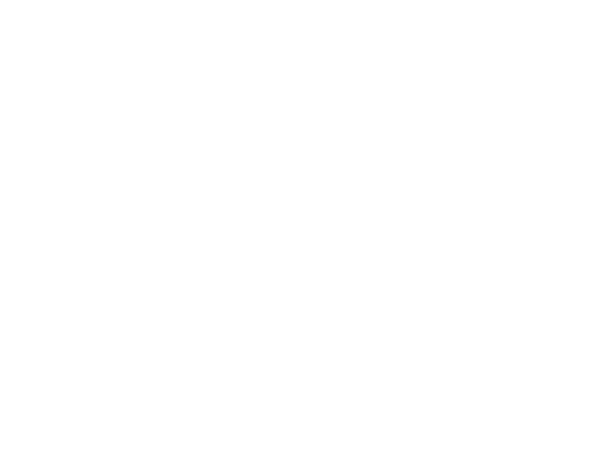

<IPython.core.display.Javascript object>


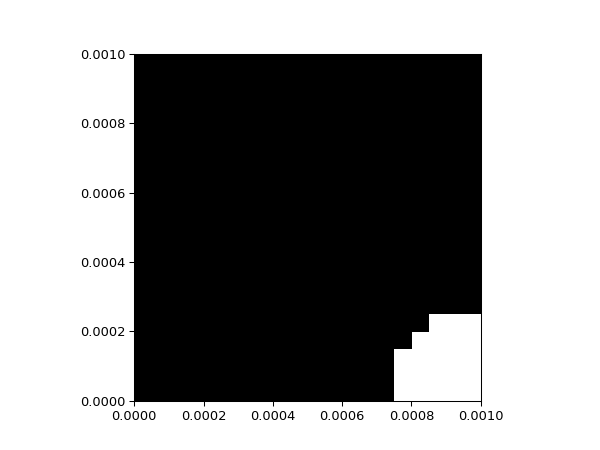

In [197]:


#partial is the  size of diameter of the circle as fraction of the side
circ = circ_mask(mask, partial =0.5, filename = "circ.png" ,plotting=True )
#circ2 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )


In [182]:
mask.x[-1]-mask.x[0]

0.001